# Assignment #1 - Linear Regression


<font color="blue"> Apnav poptani </font>

# Introduction

In this Assignment we will implement two algorithms namely least square and least mean square for linear regression of the data. The data set used here is Bike sharing dataset which has more than one dependent variable 'cnt' which is total count of rented bikes and 15 independent variables which will be used for linear regression. We preprocessed the data to check for any null values then we have explained and implemented least square and least mean squares code also visualized the predicted and the actual values of the regression, after which we have compared the two algorithms by calculating their RMSE values respectively. Finally, we have found the most and the least significant feature variables and observed the prediction after removing them and plotted a residual plot for the dataset.

# Data

The dataset used here for regression is Bike Sharing Dataset from the UCI machine learning repository. The dataset consists of 17389 data samples and 16 feature values, This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. The feature values of the data set are:
<br>
instant= record index 
<br> 
season = season (1:winter, 2:spring, 3:summer, 4:fall) 
<br>
yr = year (0: 2011, 1:2012) 
<br>
mnth = month ( 1 to 12) 
<br>
hr = hour (0 to 23) 
<br>
holiday = weather day is holiday or not
<br>
weekday = day of the week 
<br>
workingday = if day is neither weekend nor holiday is 1, otherwise is 0. 
<br> 
weathersit :
<br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy 
<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
<br>
temp = Normalized temperature in Celsius. The values are derived via
    \begin{equation*}
    \frac{t-t_{min}}{t_{max}-t_{min}} \\
    t_{min}=-8, t_{max}=+39 
    \end{equation*}
<br>
atemp = Normalized feeling temperature in Celsius. The values are derived via 
    \begin{equation*}
    \frac{t-t_{min}}{t_{max}-t_{min}} \\
    t_{min}=-16, t_{max}=+50 
    \end{equation*}

<br>
hum = Normalized humidity. The values are divided to 100 (max) 
<br>
windspeed: Normalized wind speed. The values are divided to 67 (max) 
<br>
casual = count of casual users 
<br>
registered: count of registered users 
<br>
cnt = count of total rental bikes including both casual and registered 
<br>
the two random variables are taken for testing the model and to filter out non predictive attributes.
<br>
The dataset and information is available on UCI machine learning repository.

## B.Reading the Data

Reading the .csv file for processing the data.

In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset=pd.read_csv('hour.csv')

## C.Preprocessing the Data
Checking if dataset has any null values.

In [224]:
dataset.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [225]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dropping columns:
instant, As this keeps count of entries, casual which gives count of casual users ,registered gives count of registered users , dropping these columns as they add up to form out target value 'cnt'.

In [226]:
dataset=dataset.drop(['instant','casual','registered'],axis=1)

## D.Visualization of Data and Preliminary Observations

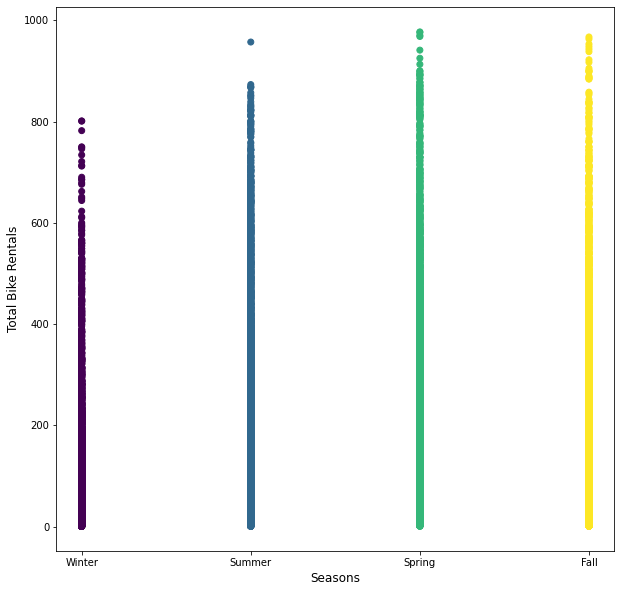

In [227]:
plt.rcParams["figure.figsize"] = (10,10)
x = [1,2,3,4]
labels = ['Winter', 'Summer', 'Spring','Fall']
plt.xticks(x, labels)
plt.xlabel('Seasons', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large');
plt.scatter('season', 'cnt', data=dataset, c='season')



#### <div align="center"> Fig 1 </div>

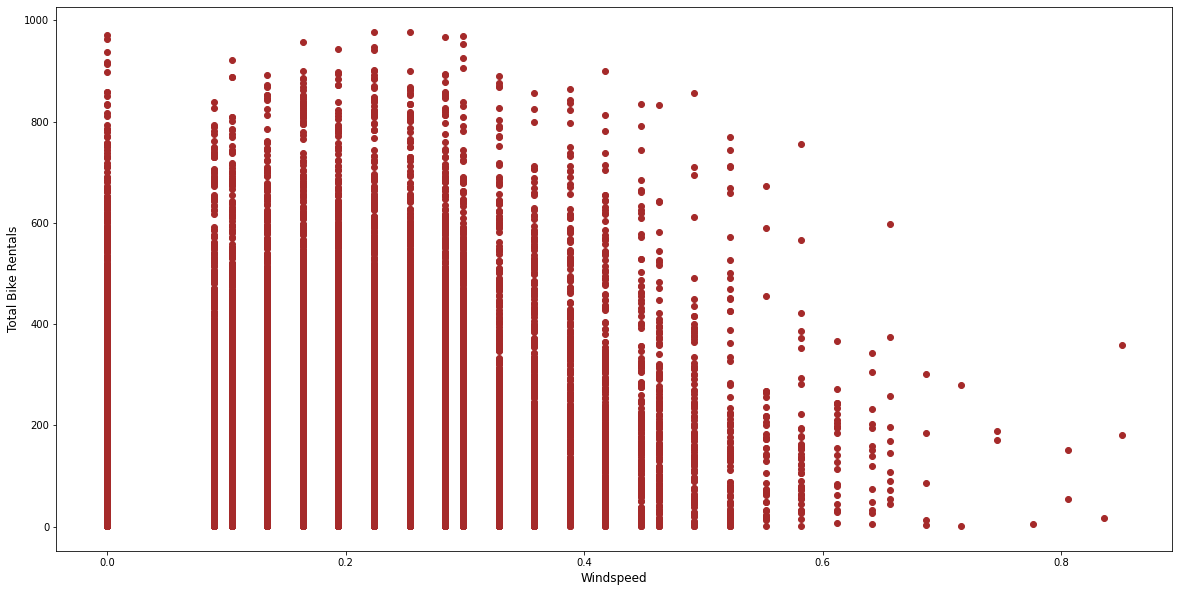

In [228]:
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Windspeed', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large')
plt.scatter(dataset['windspeed'], dataset['cnt'],color='brown')

#### <div align="center"> Fig 2 </div>

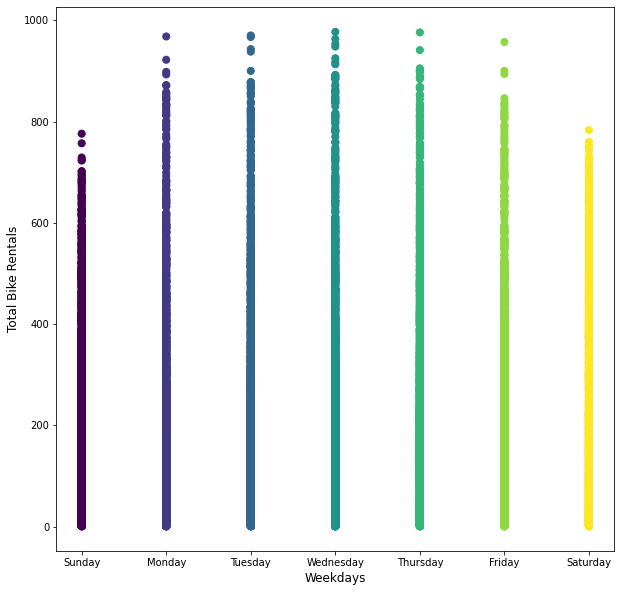

In [229]:
plt.rcParams["figure.figsize"] = (10,10)
x = [0,1,2,3,4,5,6]
labels = ['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.xticks(x, labels)
plt.xlabel('Weekdays', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large')
plt.scatter('weekday', 'cnt', data=dataset,s=50, c='weekday')



#### <div align="center"> Fig 3 </div>

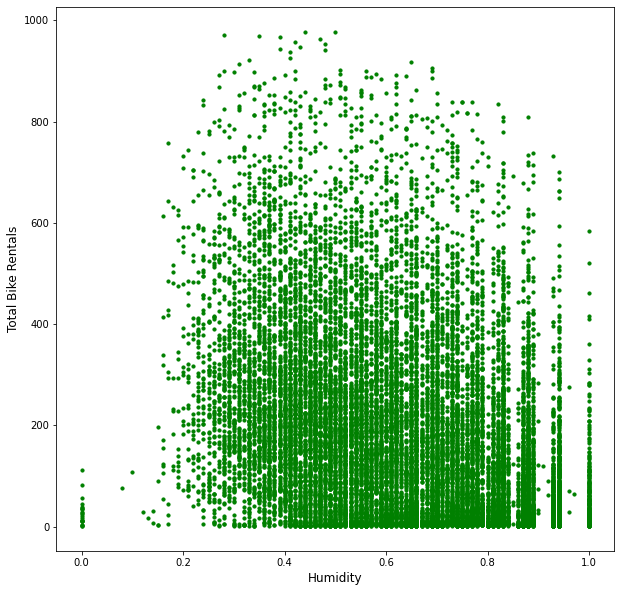

In [230]:
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Humidity', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large')
plt.scatter('hum', 'cnt', data=dataset,s=10, c='green')

#### <div align="center"> Fig 4 </div>

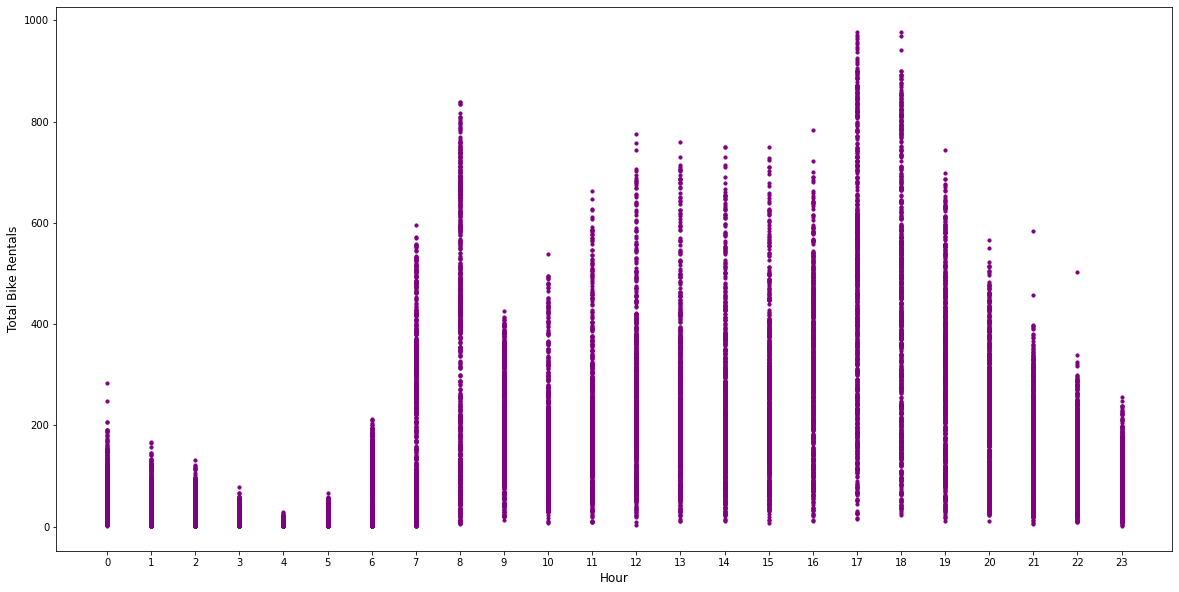

In [231]:
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks([x for x in range(0,24)])
plt.xlabel('Hour', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large');
plt.scatter('hr', 'cnt', data=dataset,s=10, c='purple')

#### <div align="center"> Fig 5 </div>

Text(0, 0.5, 'Total Bike Rentals')

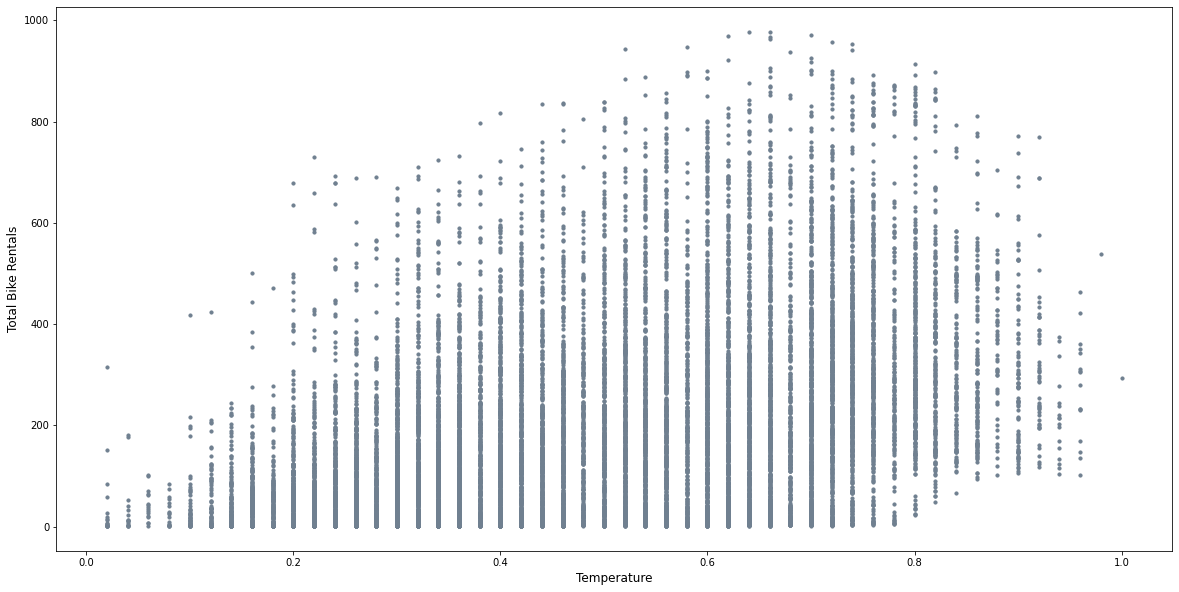

In [232]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter('temp' ,'cnt',data=dataset,c='slategray',s=10)
plt.xlabel('Temperature', fontsize='large')
plt.ylabel('Total Bike Rentals', fontsize='large')

#### <div align="center"> Fig 6 </div>

## E.Preliminary observation

#### Fig1. Seasons vs Total Bike Rentals
The scatter plot shows the count of total bikes rented in that season with seasons. It can be clearly seen that most bikes were rented in spring season.

#### Fig2. Windspeed vs Total Bike Rentals
This scatter plot shows the count of total bikes rented in that season with respect to windspeed. It can be clearly seen that bike rentals are inversely proportional with windspeed.

#### Fig3. Weekdays vs Total Bike Rentals
This scatter plot shows the count of total bikes rented in that season with days of week. It can be clearly seen that most bikes were rented in weekdays.

#### Fig4. Humidity vs Total Bike Rentals
This scatter plot shows the count of total bikes rented in that season with respect to Humidity. It can be clearly seen that most bikes were rented in more humid conditions.

#### Fig5. Hour of day vs Total Bike Rentals
This scatter plot shows the count of total bikes rented in that season with respect to hour of day. It can be clearly seen that most bikes were rented in peak office hours.

#### Fig6. Temperature vs Total Bike Rentals
This scatter plot shows the count of total bikes rented in that season with respect to temperature. It can be clearly seen that most bikes were rented in warmer temperature.

# Method

## A. Review

A linear model will make a prediction by computing the weighted sum of input features and a bias term.
We can represent a linear combination of input x and weights w as:
    
$$
\begin{align*}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align*}
$$

#### Least Squares 

In Least Squares, we take the distance between actual and predicted values ,square them and calculate the sum of those values. Here we try to minimize the error function of the linear model, which gives us the following equation for least squares:

$$ w = { (X^\top X)^{-1} (X ^\top t)} $$

where, X is the input matrix of N*D dimension
<br>
t = matrix of target values
<br>
w = matrix of weights

#### Least Mean Squares

In Least Mean Squares, we do not train the entire data available together , rather it follows online learning process. Here we calculate the weights after each iteration and make a new estimation based on the previous calculation.LMS is represented as:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k.
$$

where, k = number of steps
<br>
𝐸𝑘= error rate for k samples 
<br>
𝛼 = learning rate
<br>

## B.Explanation along with the Code

### Super Classs Definition

In [1]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

Here we will implement least square and least mean square algorithms. A super class is implemented here having a base class BaseModel having two abstract methods train and use. Next the LinearModel class is implemented inheriting BaseModel class, it has a contructor which initializes the weight to None. The class has a _check_matrix fuction which will check if the passed matrix is 2 dimensional and another function add_ones which adds a bias column to our matrix of ones. LinearModel class also has two abstract methods from its parent the BaseModel which are train and use but are not defined over here.

### Least Squares

In [2]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X=np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.linalg.solve(X.T @ X, X.T @ T) 
        
    # apply the learned model to data X
    def use(self, X):
        X=np.hstack((np.ones((X.shape[0], 1)), X))
        y = X @ self.w
        return y

The LinearRegress class here is inheriting the LinearModel class, this LinearRegress class will implement the least squares algorithm on our data. The constructor calls the parent class constructor to set the weights to none. Here we have defined the two train and use methods which were declared in the parent class. The train method accepts two parameters our 2 dimensional matix of dataset and the target vector, we then simply add a column bias of one to our input matrix and then calculate the weight by using np.linalg.solve method. In the use method we return the matrix of predicted values and the dot product of weight matrix calculated in the train method.

### Least Mean Squares

In [3]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)

    # here the x is 1d vector
    def train_step(self, x, t):
        x=np.append(1, x).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        self.w -=self.alpha*(self.w.T@x-t)*x 
    
    # apply the current model to data X
    def use(self, X):
        X=np.hstack((np.ones((X.shape[0], 1)), X)).T
        Y = X.T @ self.w
        return Y

The LMS class is used here to implement the LMS algorithm on our dataset. LMS class also inherits the LinearModel class, same as our LinearRegress class we have a constuctor here which calls the parent class also we have a alpha variable which is the learning rate which we will need to pass while calling the class. In the train method we are calling the train_step method to train step by step on our dataset and give the predicted output of entire training here.
In the train_step method we will calulate the weights at each step of the training by using the LMS formula,this method will return the weights after each step of training.
The use method is similar to LinearRegress method where we will get the dot product of final weights and the given data of dataset to get our predicted values.

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [4]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


### Usage Examples

In [5]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

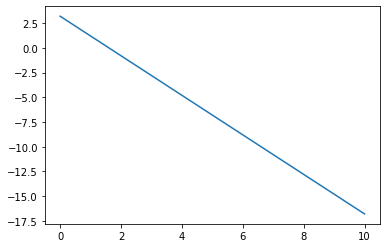

In [6]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

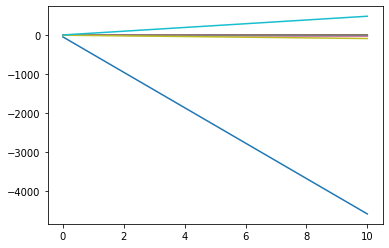

In [7]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

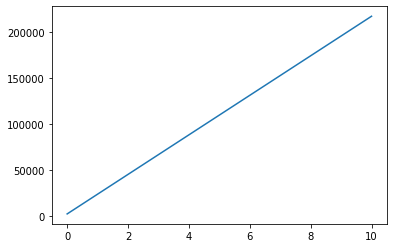

In [8]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

## A.Description along with the Code and Visualizing the data

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset=pd.read_csv('hour.csv')

In [10]:
dataset=dataset.drop(['instant','casual','registered'],axis=1)

Dividing the dataset into target feature and other features and dropping irrelevant feature which make less impact or no impact on the prediction. Also taking the dataset in heat to plot the correltion further.

In [11]:
def split(dataset ,size=0.5):
    train_idx = dataset.sample(int(dataset.shape[0]*size)).index
    train_dataset = dataset.loc[train_idx]
    test_dataset = dataset.drop(train_idx)
    cols_drop= ["cnt" , "atemp"]
    return train_dataset.drop(cols_drop , axis=1).to_numpy() ,test_dataset.drop(cols_drop , axis=1).to_numpy(),train_dataset["cnt"].to_numpy(),test_dataset["cnt"].to_numpy()

In [12]:
X_train,X_test,y_train,y_test= split(dataset , 0.8)

Here we divide the dataset into training and testing with 80% data in training and remaining 20% data in testing.

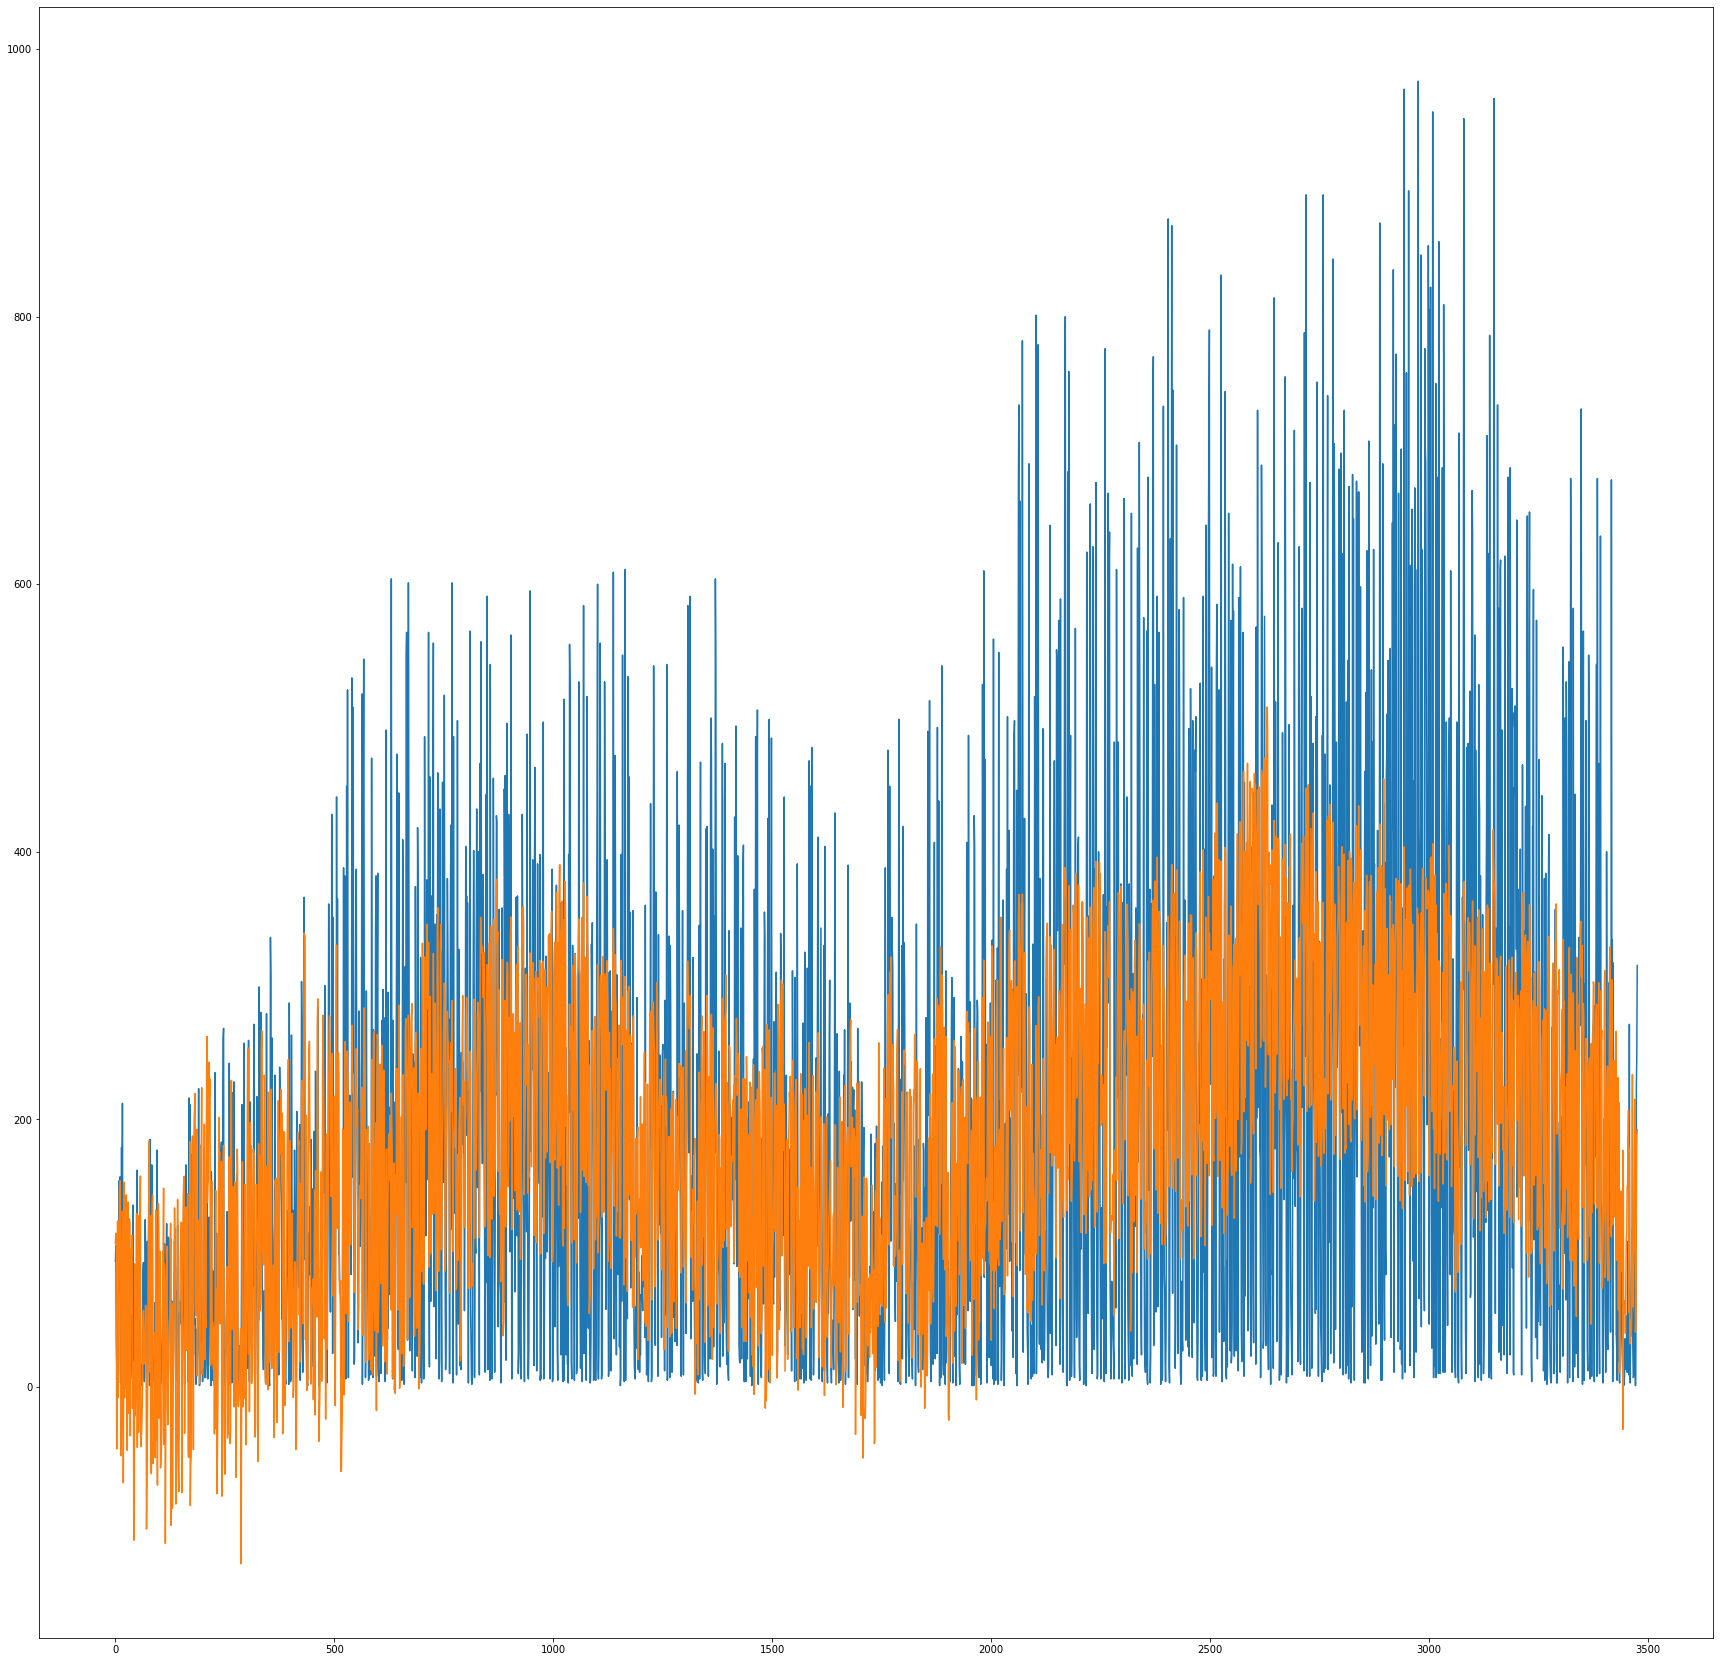

In [26]:
ls = LinearRegress()
ls.train(X_train, y_train)
r=ls.use(X_test)
plt.figure(figsize=(30,30))
# plt.scatter(r , y_test,s=100)
plt.plot(y_test)
plt.plot(r)

In [14]:
rmsels=np.sqrt(np.mean((r-y_test)**2))
rmsels

142.45830242277484

Here we call the ls function with out training dataset and target value which gives us the test_x predicted values and have plotted it with the test_y values . We can see the plot is fitting the data where the target values.

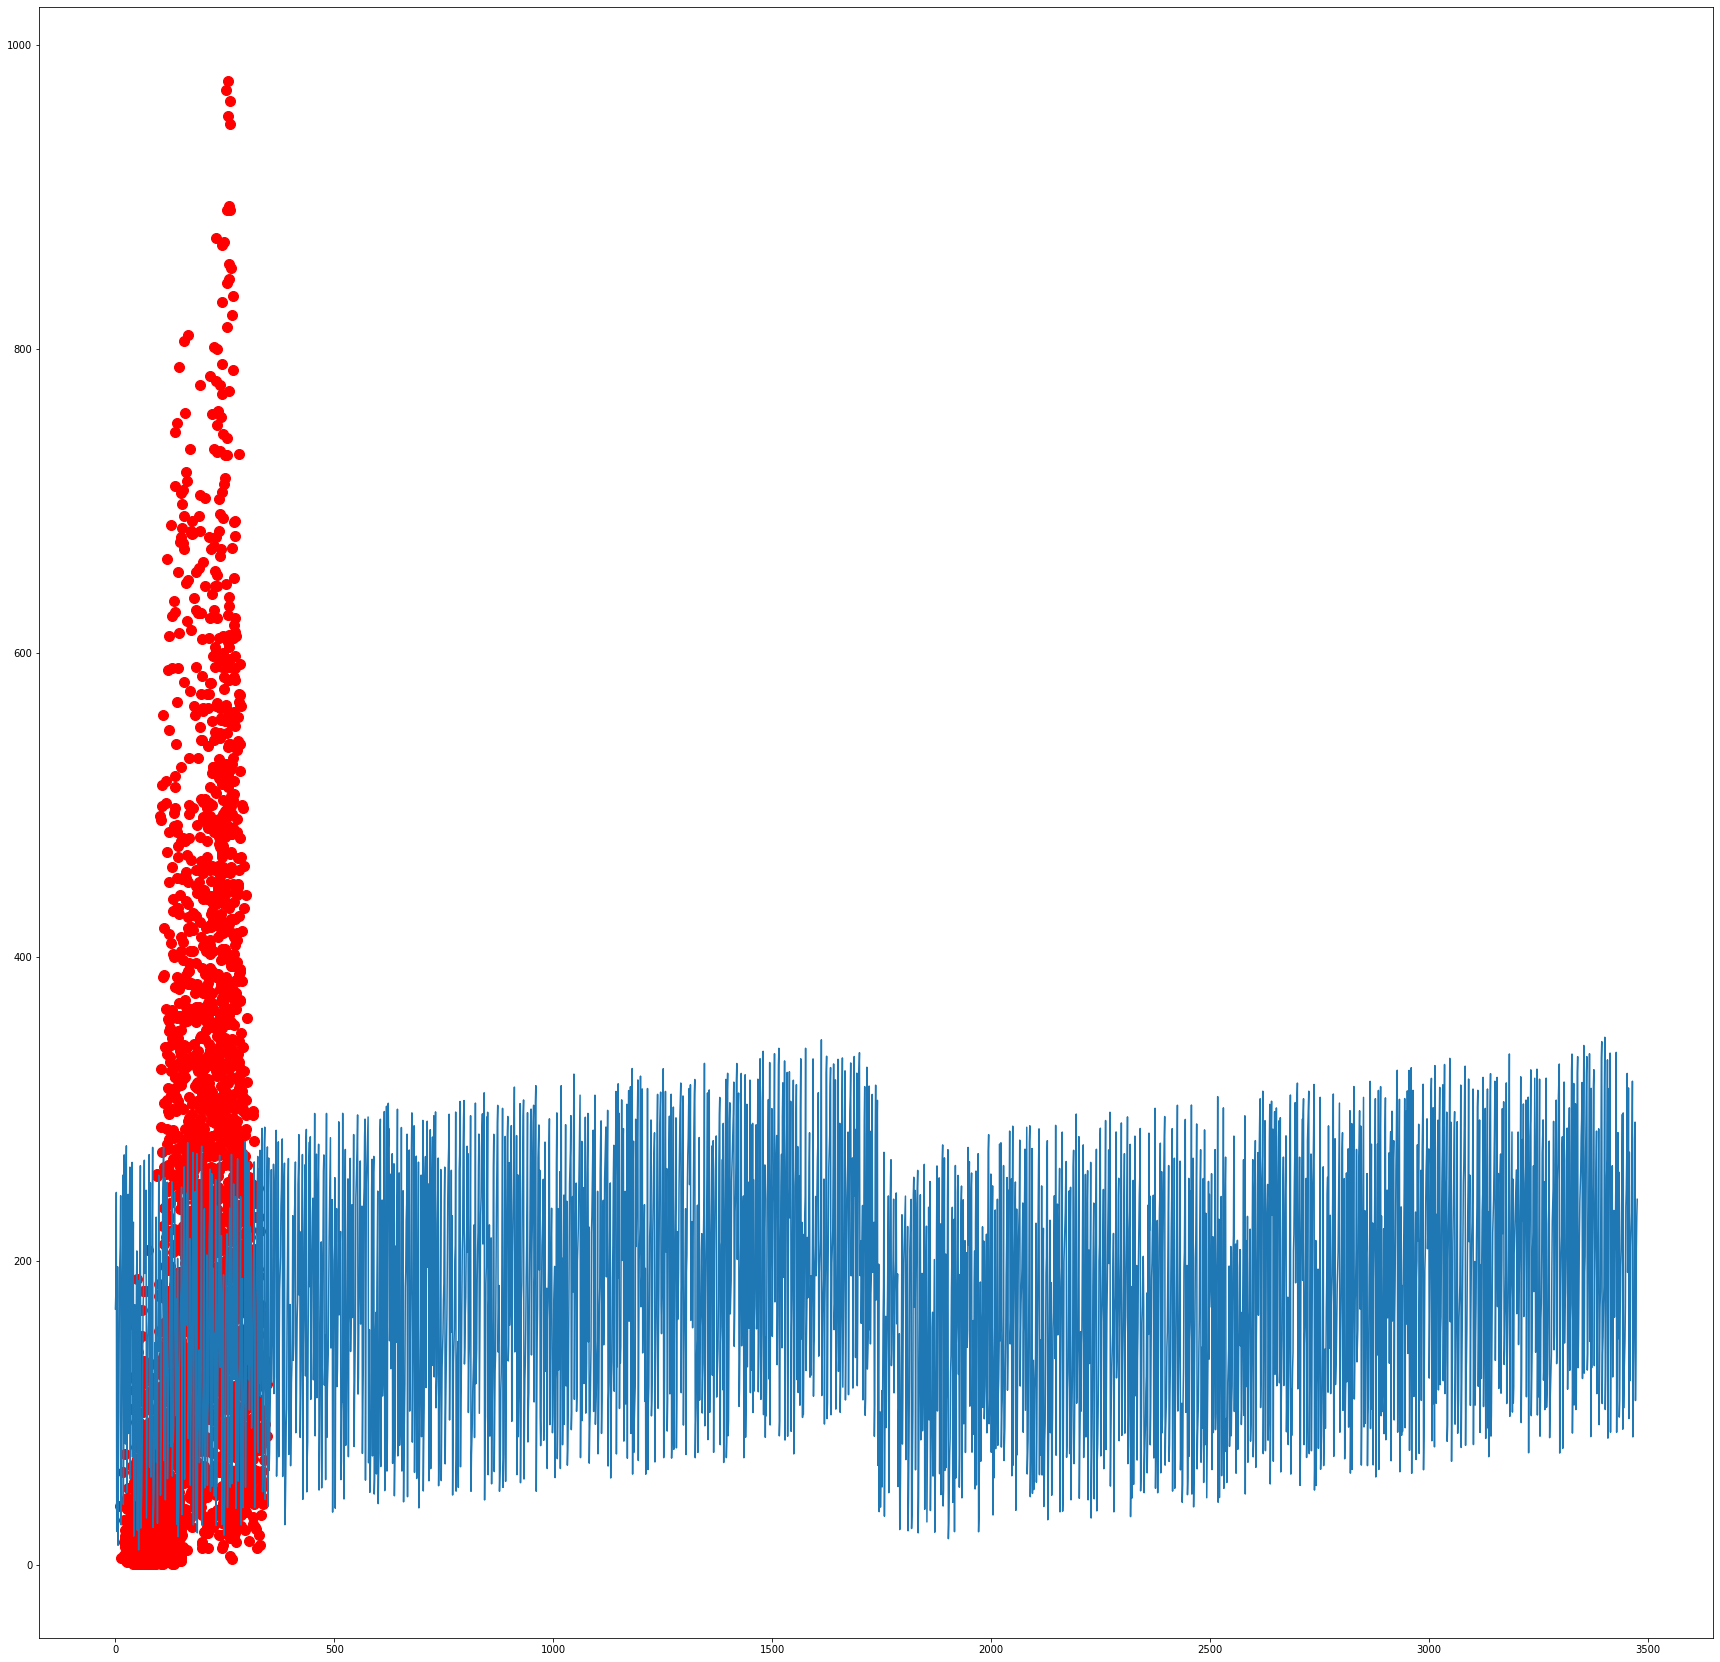

In [34]:
lms = LMS(0.000001)
lms.train(X_train, y_train)
r1=lms.use(X_test)
plt.figure(figsize=(30,30))
plt.scatter(r1,y_test, c='red',s=100)    
plt.plot(r1)

Here we call the lms function with out training dataset and target value which gives us the test_x predicted values and have plotted it in step wise as the lms algorithm trains data in steps, along with the test_y values . We can see the plot will finall fit the data where the target value count of bikes rented(cnt). This here is done in steps by using the learning rate and finally predict the best fit.

In [16]:
rmselms=np.sqrt(np.mean((r1-y_test)**2))
rmselms

197.36739490488713

## C. Analysis and comparison of algorithm

Comparison between the two algorithms shows us that LS plots the graph of predicted values with entire training dataset while LMS plots the graph training gradually step by step on individual features from the dataset. Thus,LMS is used for online learning where step by step training is required.
The least square method is computationally expensive as the calculations include matrix transpose and multiplication however it takes less time to train the model here while the least square method can be computationally much more efficient but the trainig time required for LMS is much more than LS.Weight values are updated after each step in lms step algrithm.<br>
For analysis of ls and lms algorithms, we can show the rmse value for both ls and lms algorithms which comes out to be 145.09 and 169.81 respectively.

# Extra Credit

### what is the most and least significant features for your data.
### what are the consequences if you remove those features from the model? (Show your work!)
 
    

<AxesSubplot:>

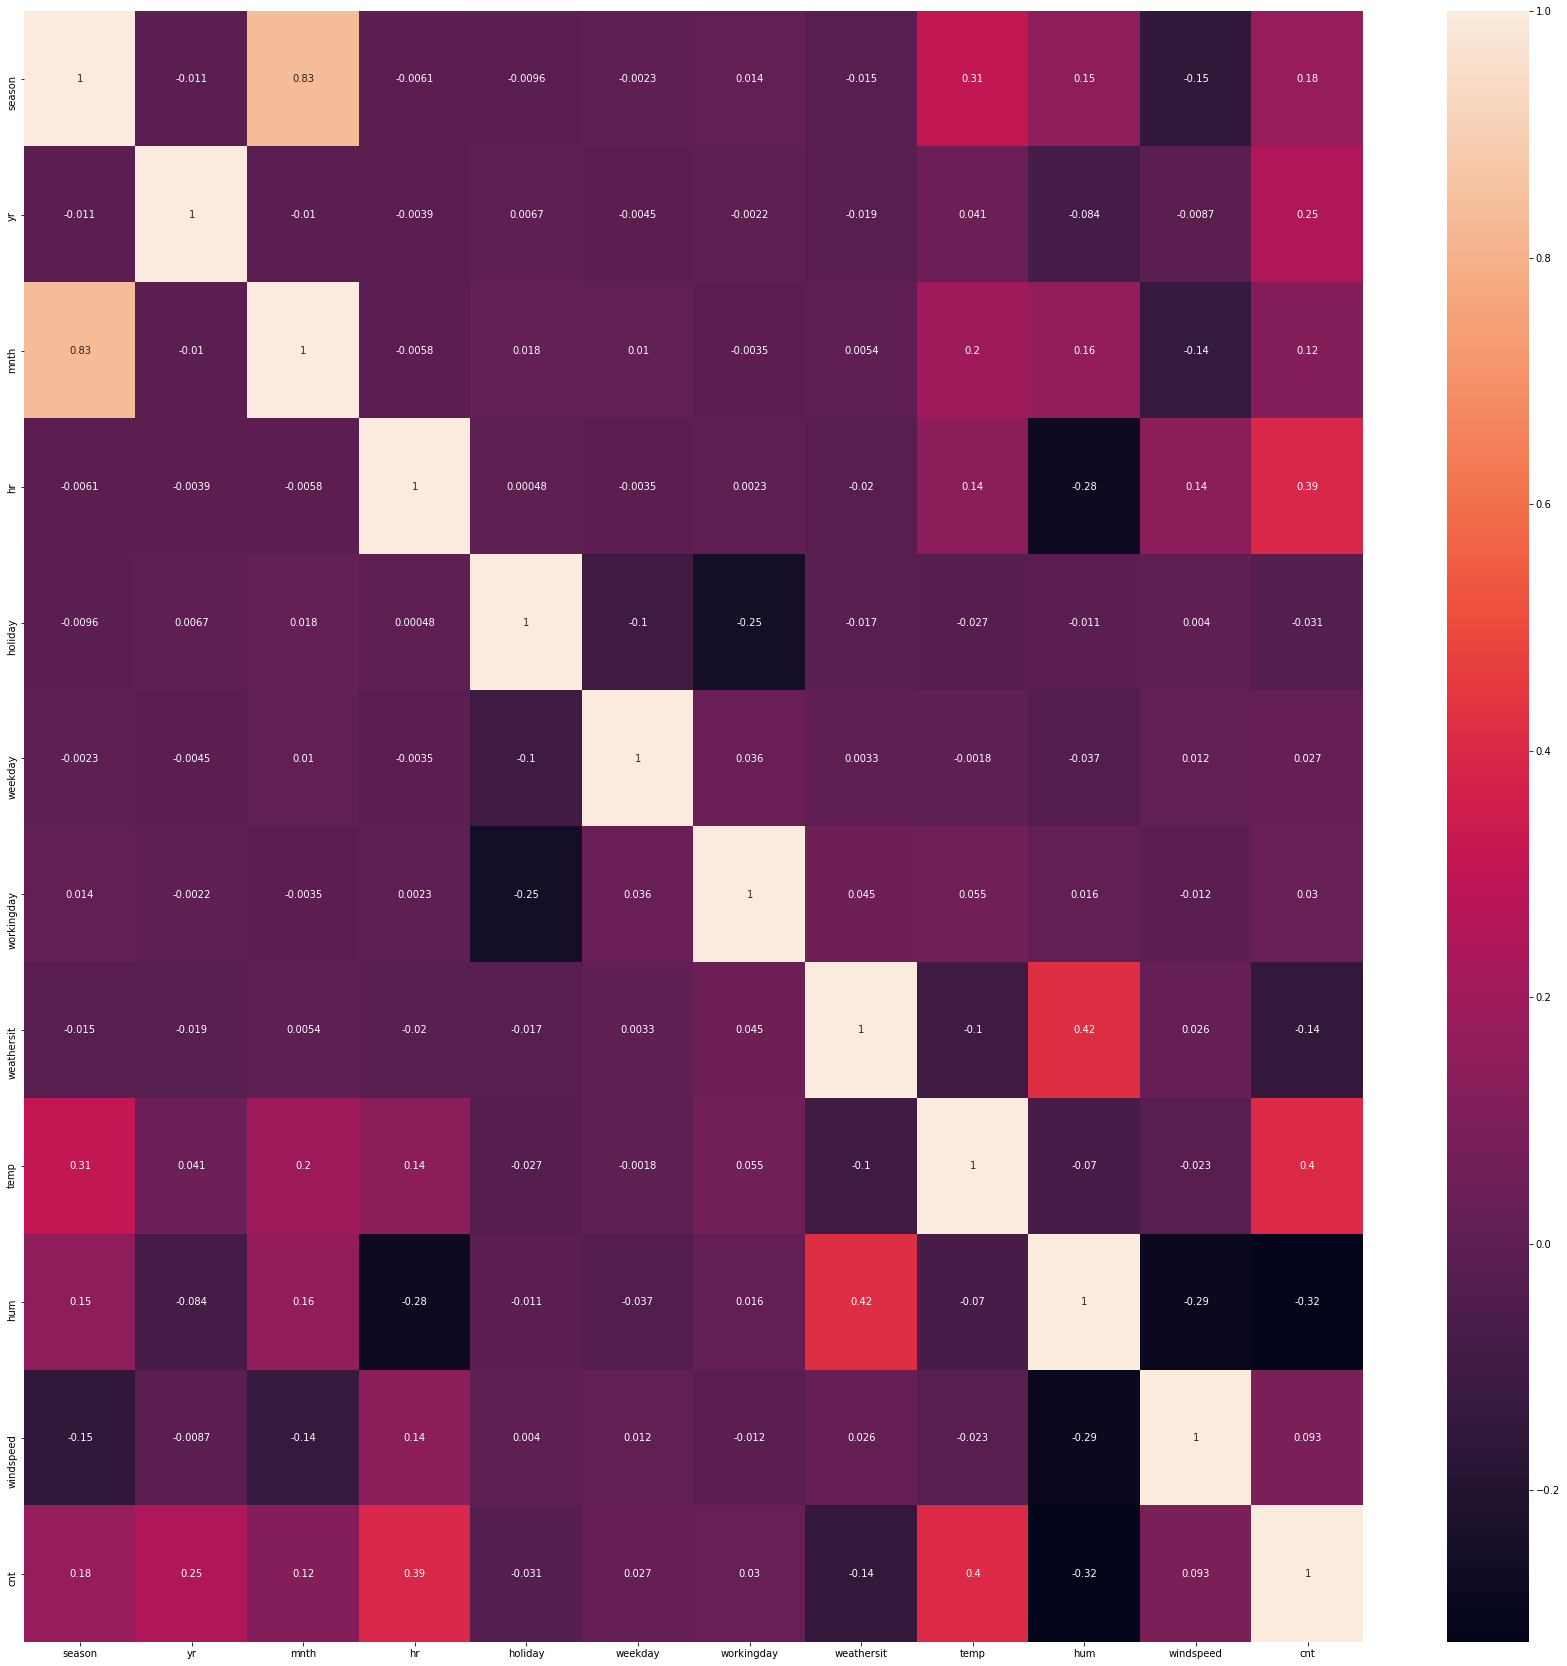

In [17]:
import seaborn as sb
plt.figure(figsize=(30,30))
features=['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'cnt']
sb.heatmap(dataset[features].corr(),annot=True)



In [18]:
dataset.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
temp          0.404772
atemp         0.400929
hr            0.394071
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

##### 1. Analysing the heat map we can see that 'temp','hr' feature is most significant to the target feature 'cnt'.

In [19]:
dataset_most=dataset.drop(['temp','hr'],axis=1)
dataset_most

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,1,0.2879,0.81,0.0000,16
1,1,0,1,0,6,0,1,0.2727,0.80,0.0000,40
2,1,0,1,0,6,0,1,0.2727,0.80,0.0000,32
3,1,0,1,0,6,0,1,0.2879,0.75,0.0000,13
4,1,0,1,0,6,0,1,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,0,1,1,2,0.2576,0.60,0.1642,119
17375,1,1,12,0,1,1,2,0.2576,0.60,0.1642,89
17376,1,1,12,0,1,1,1,0.2576,0.60,0.1642,90
17377,1,1,12,0,1,1,1,0.2727,0.56,0.1343,61


In [20]:
X_train,X_test,y_train,y_test= split(dataset_most , 0.8)

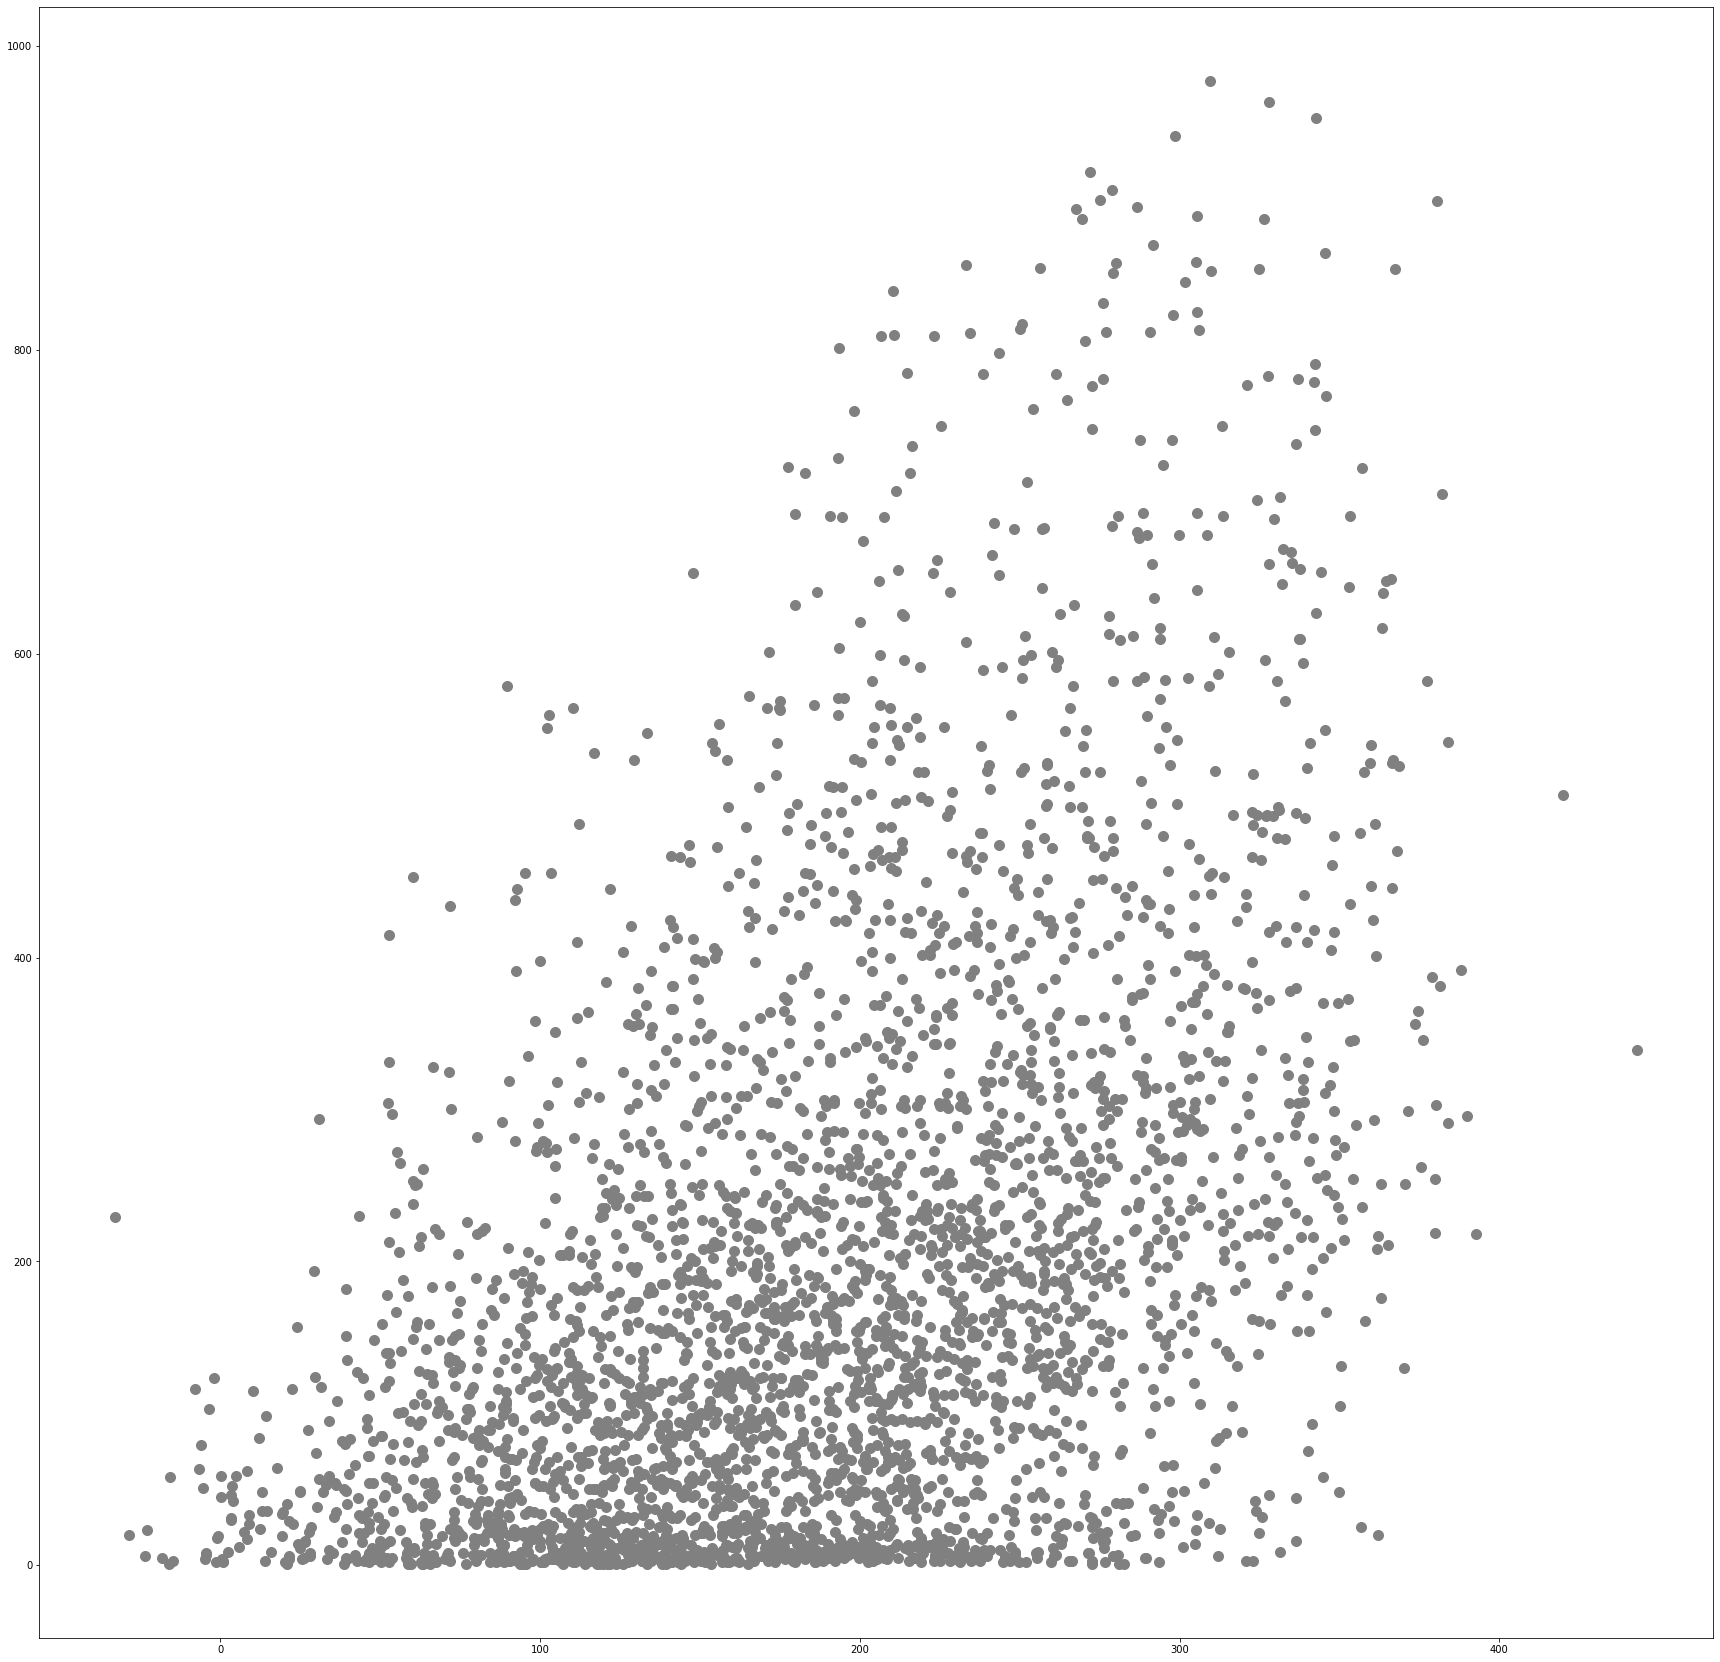

In [21]:
ls = LinearRegress()
plt.figure(figsize=(30,30))
ls.train(X_train, y_train)
most=ls.use(X_test)
plt.scatter(most , y_test,c='grey',s=100)
plt.show()  

In [22]:
rmsemost=np.sqrt(np.mean((most -  y_test)**2))
rmsemost

162.43276632011714

In [23]:
rmsels

140.72733251926718

# Observation :
As tempreature and hour are the most significant feature of our dataset on the target value we can see a increase in  in the rmse value.

##### 1. Analysing the heat map we can see that 'weekday' feature is least significant to the target feature 'cnt'.
As the more negative value also signifies bias, taking the lowest absolute value as least significant attribute.

In [24]:
dataset_least=dataset.drop(['weekday'],axis=1)
dataset_least

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,0.26,0.2727,0.56,0.1343,61


In [25]:
X_train,X_test,y_train,y_test= split(dataset_least , 0.8)

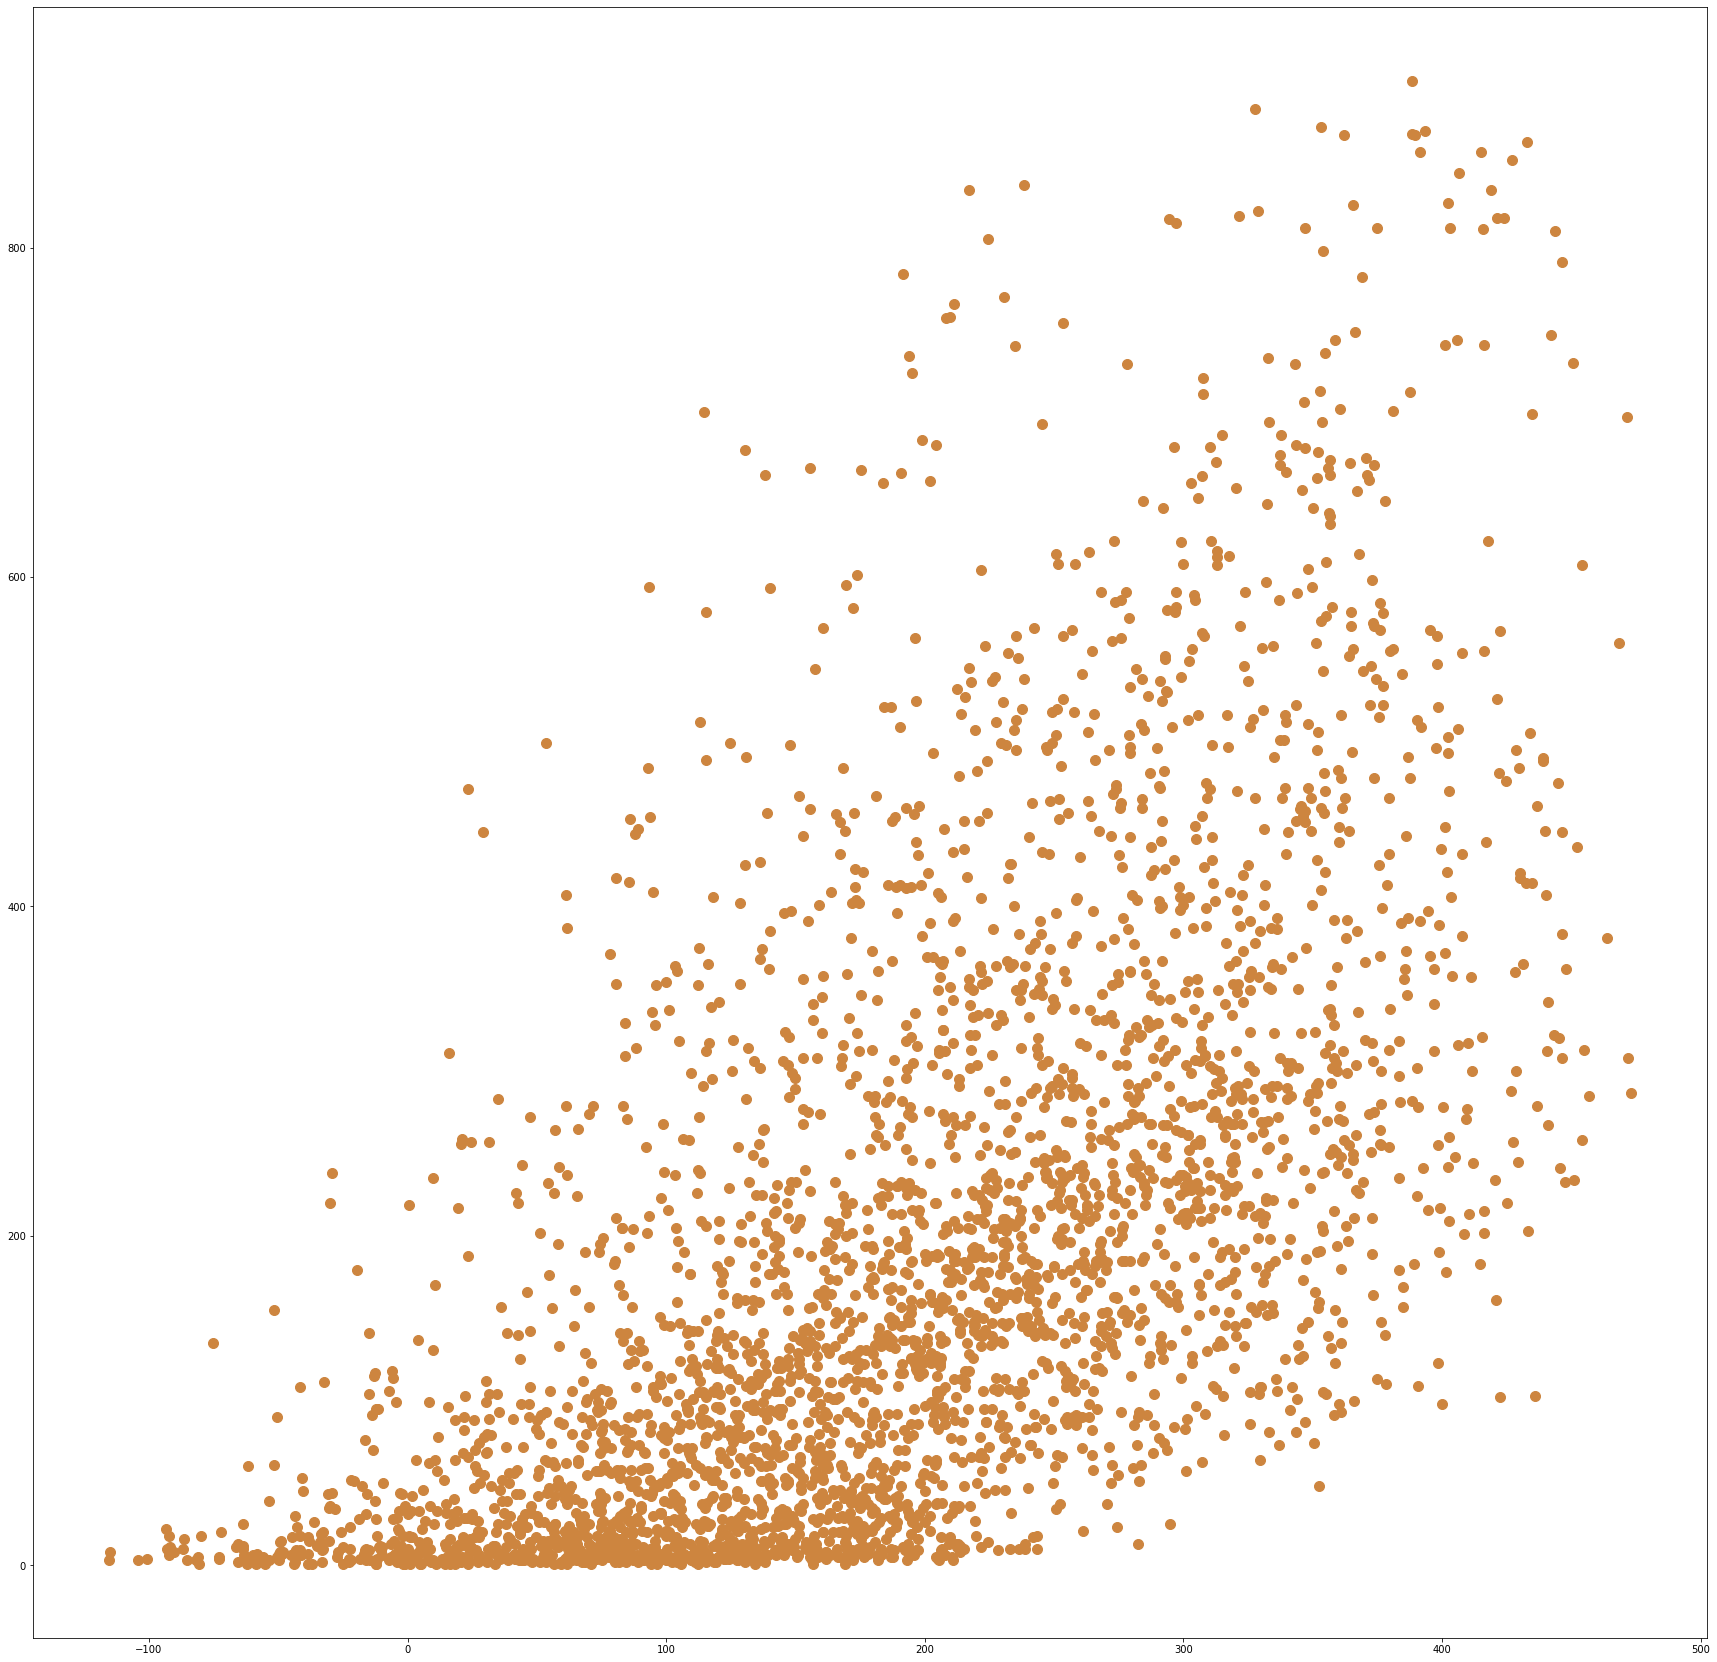

In [26]:
ls = LinearRegress()
plt.figure(figsize=(30,30))
ls.train(X_train, y_train)
least=ls.use(X_test)
plt.scatter(least, y_test,c='peru',s=100)
plt.show()  

In [27]:
rmseleast=np.sqrt(np.mean((least.T -  y_test)**2))
rmseleast

142.40502731008752

In [28]:
rmsels

140.72733251926718

# Observation :
As weekday is the least significant value, Removing it is creating negligible difference on rmse value.

### produce residual plots and observe the patterns for the goodness of fit   

#### Residual plot for Linear Regression

In [29]:
import statsmodels.formula.api as smf
regmost = smf.ols('cnt ~season+ yr + mnth+holiday+ weekday+ workingday + weathersit + hum+ windspeed', data=dataset).fit()

In [30]:
pred_valm = regmost.fittedvalues.copy()
true_valm = dataset['cnt'].values.copy()
residualm = true_valm - pred_valm

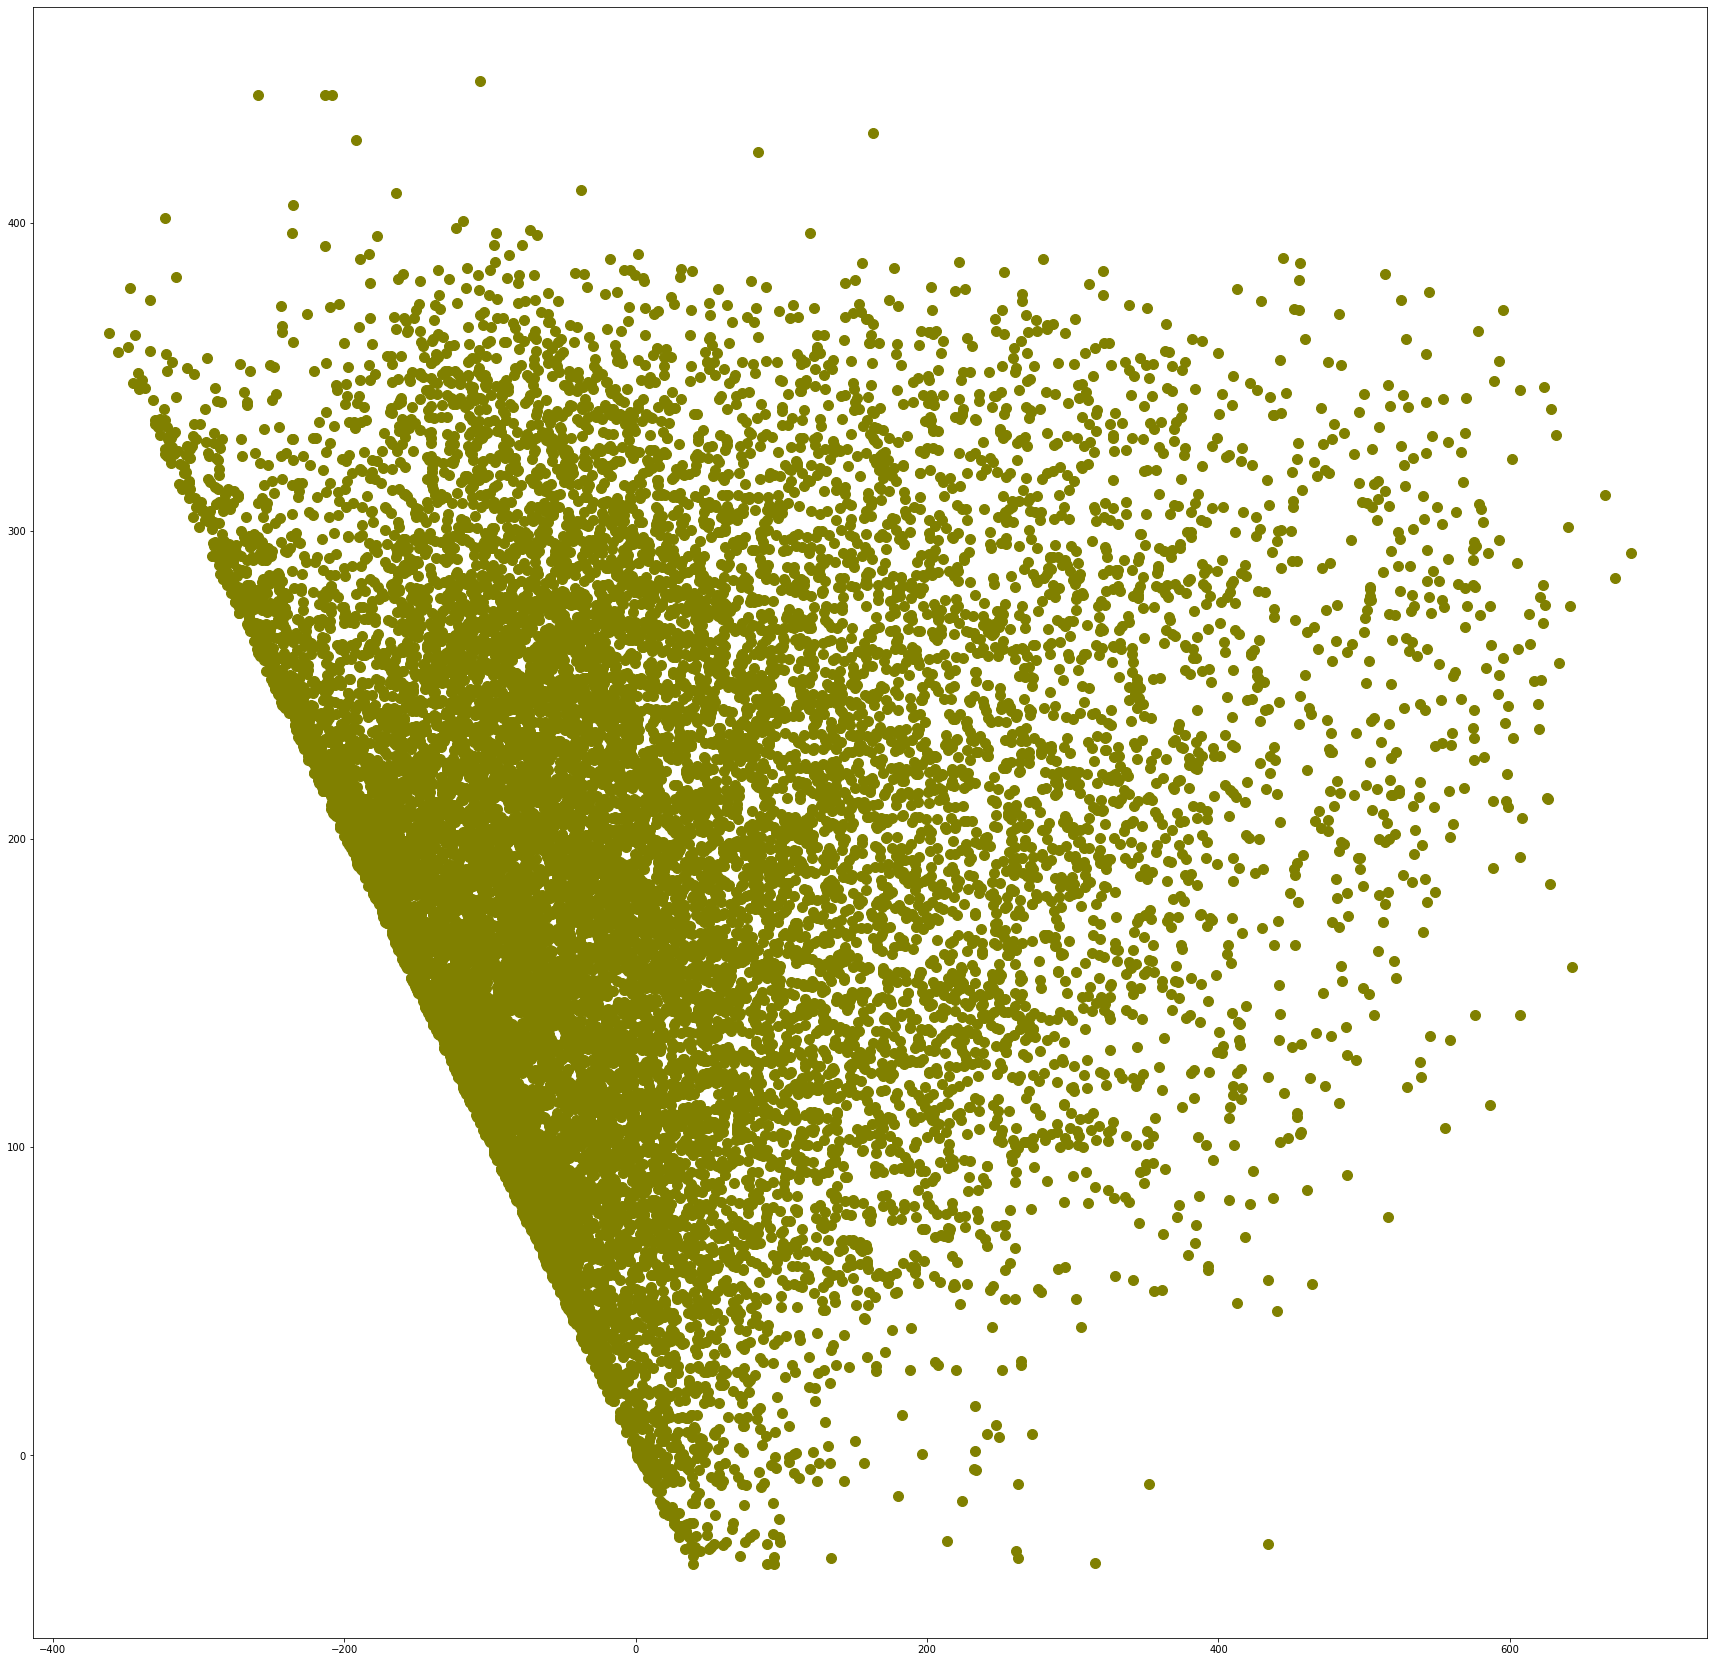

In [31]:
plt.figure(figsize=(30,30))
plt.scatter(residualm, pred_valm,c='olive',s=100)

This residual plot show predicted values after removing the most significant feature tempreature and hour.

In [32]:
regleast = smf.ols('cnt ~season+temp+hr+ yr + mnth+holiday+ workingday + weathersit + hum+ windspeed', data=dataset).fit()

In [33]:
pred_vall = regleast.fittedvalues.copy()
true_vall = dataset['cnt'].values.copy()
residuall = true_vall - pred_vall

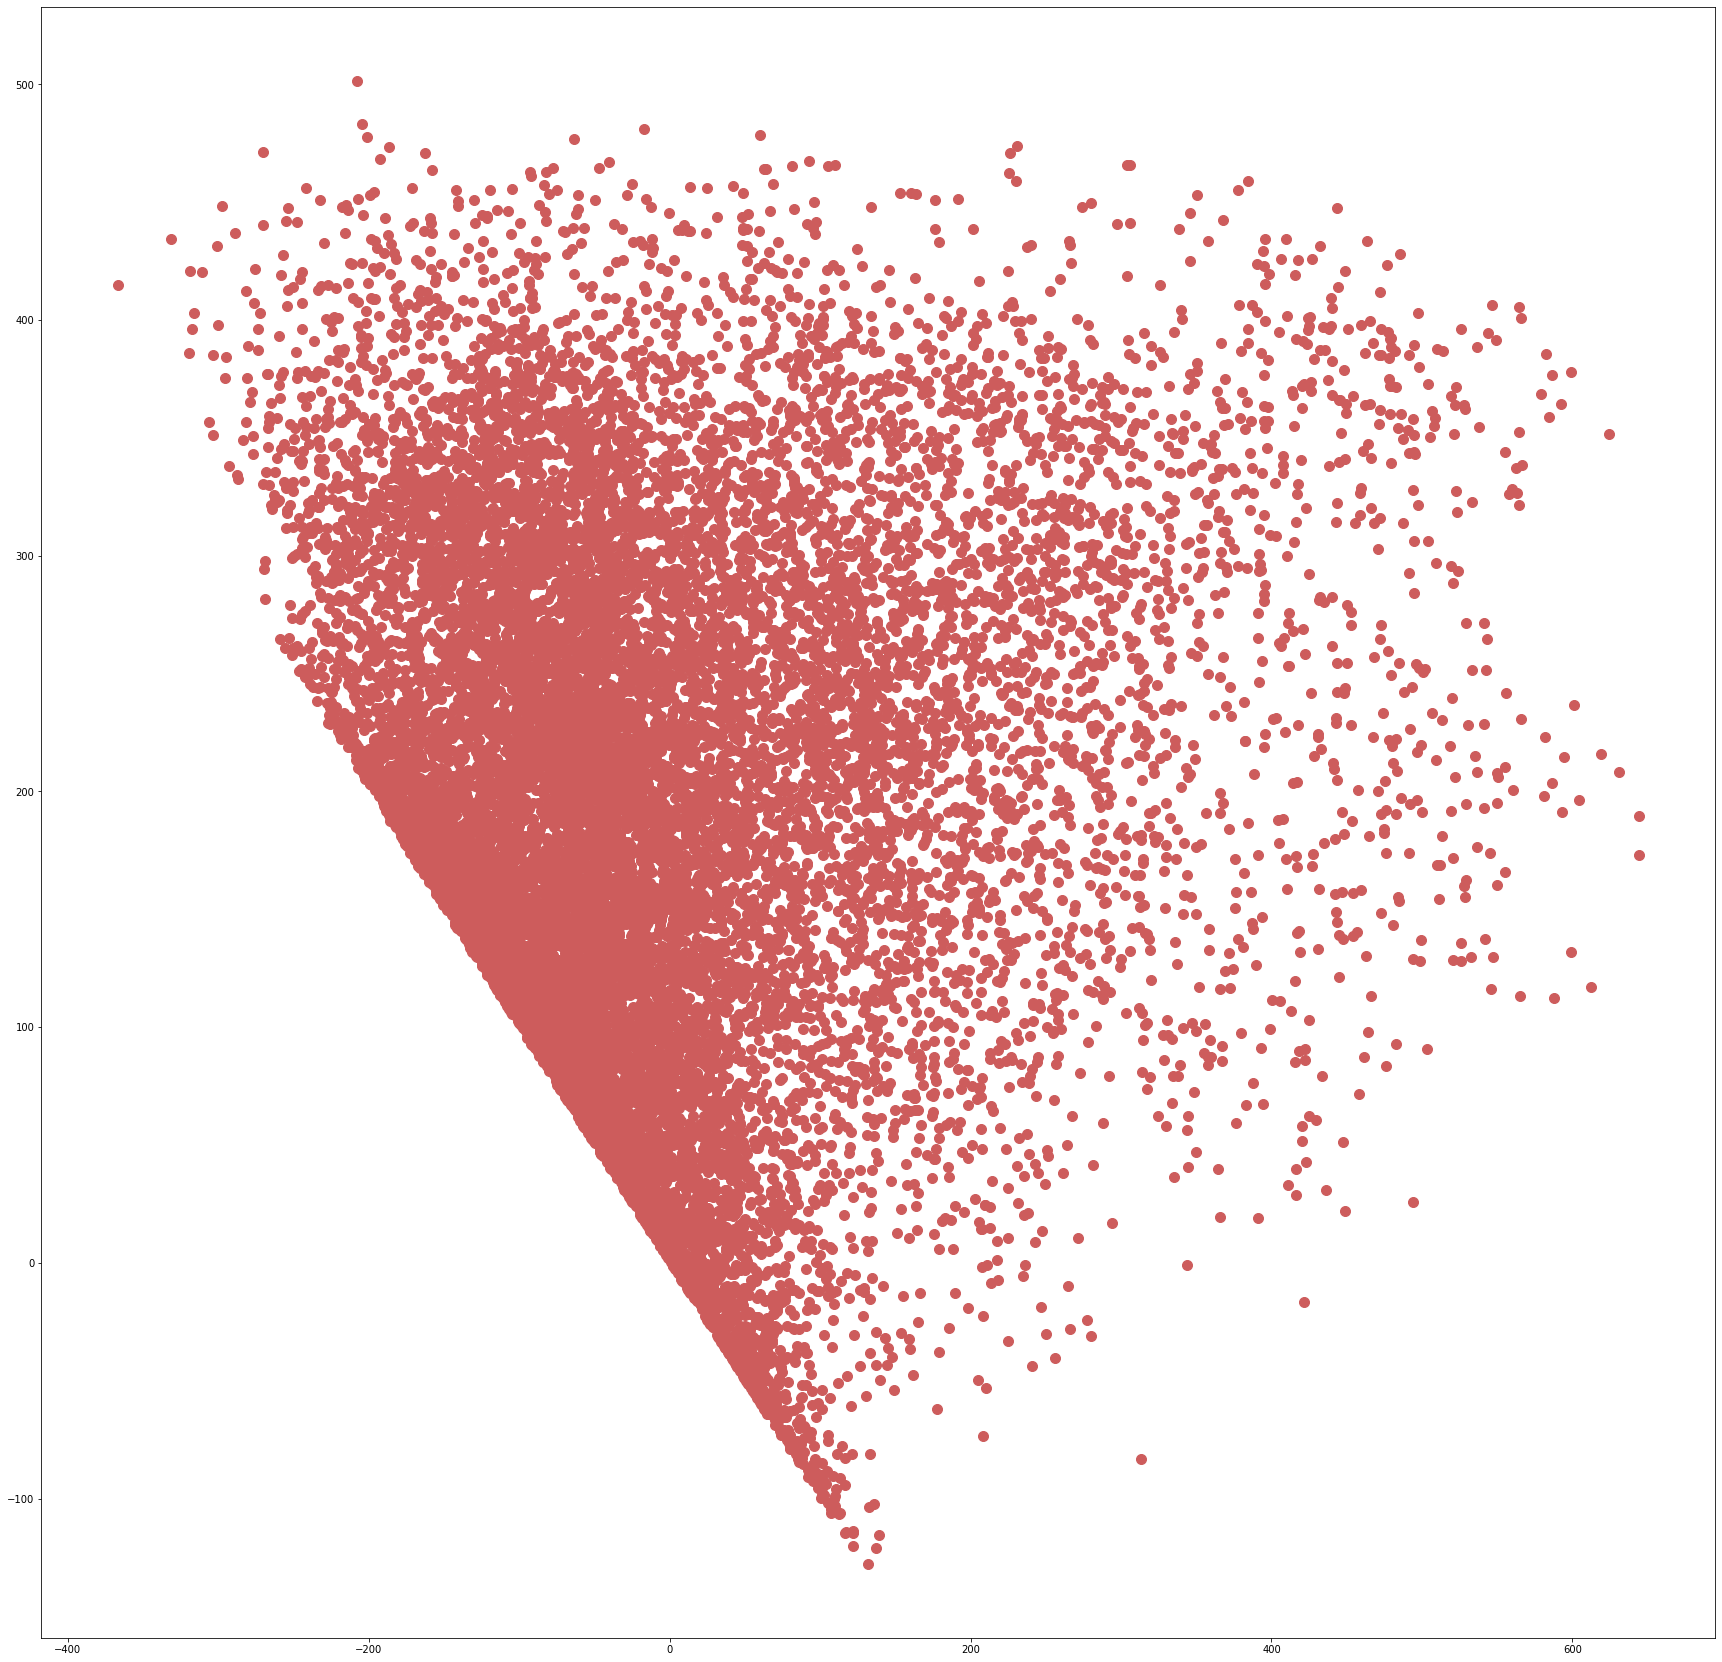

In [34]:
plt.figure(figsize=(30,30))
plt.scatter(residuall, pred_vall,c='indianred',s=100)

This residual plot show predicted values after removing the least significant feature weekday

# Conclusions


I learned about linear regression in this assignment through two algorithms namely least squares and least mean squares and the working on a large dataset.I learned how to find correlation between target value with other values, this helped me to find most and least significant attributes. Also what happens to predicted values if they are removed.

While implementing the assignment challenges faced were understanding the working of the LS and LMS algorithm and work the algorithms with the dataset.

# References

[1] Hadi Fanaee-T. Bike Sharing Dataset Data Set, Dec. 2013, https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
<br>
[2] Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg,doi:10.1007/s13748-013-0040-3
<br>
[3] Zhiyzuo. (2018, May 1). Linear Regression Diagnostic in Python with StatsModels, https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/
<br>
[4] Professor's Notebooks
